## Importing the Dataset and required Libraries

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns

In [232]:
df = pd.read_csv('aug_train.csv')

## Understanding the Data

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [234]:
print("The number of rows in this Dataset is: ", df.shape[0])
print("The number of columns in this Dataset is: ", df.shape[1])

The number of rows in this Dataset is:  19158
The number of columns in this Dataset is:  14


In [235]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


##  Analysing null values

In [236]:
df.columns[df.isnull().any()]

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], dtype='object')

In [237]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [238]:
df1 = df.copy()

<AxesSubplot:>

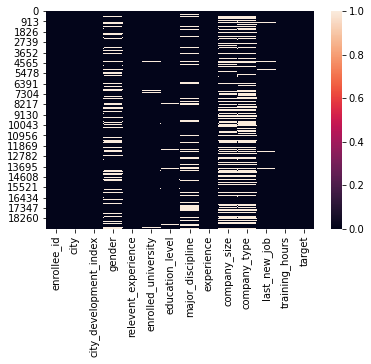

In [239]:
sns.heatmap(df.isnull())

### Filling the 'gender' column

In [240]:
df1['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [241]:
df1['gender'].value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [242]:
gen_dict = {np.nan: 'Prefer not to say'}
df1['gender'].fillna(df1['gender'].map(gen_dict), inplace = True) # filling the null values with 'prefer not to say'

In [243]:
df1['gender'].isnull().sum()

0

### Filling the 'enrolled_university' column 

In [244]:
df1['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [245]:
uni_dict = {np.nan: 'Other'}
df1['enrolled_university'].fillna(df1['enrolled_university'].map(uni_dict), inplace = True) # filling the null values with 'Other'

In [246]:
df1['enrolled_university'].isnull().sum()

0

### Filling the 'education_level' column

In [247]:
df1['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [248]:
edu_dict = {np.nan: 'Graduate'}
df1['education_level'].fillna(df1['education_level'].map(edu_dict), inplace = True) 
# filling the null values with 'Graduate' as that is the most occuring value

In [249]:
df1['education_level'].isnull().sum()

0

### Filling the 'major_discipline' column

In [250]:
df1['major_discipline'].value_counts(dropna = False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [251]:
disp_dict = {np.nan: 'STEM'}
df1['major_discipline'].fillna(df1['major_discipline'].map(disp_dict), inplace = True) 
# filling the null values with 'STEM' as that is the most occuring value

In [252]:
df1['major_discipline'].isnull().sum()

0

### Filling the 'experience' column

In [253]:
df1['experience'].value_counts(dropna = False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [254]:
df1['experience'].replace({'>20':25, '<1': 0}, inplace = True)

In [255]:
experience = df1.groupby('experience')['enrollee_id'].count().reset_index().rename(columns = {'enrollee_id': 'frequency'})

In [256]:
my_series  = pd.to_numeric(experience['experience'])

In [257]:
experience['experience'] = my_series

In [258]:
experience.head()

,experience,frequency
0,0,522
1,25,3286
2,1,549
3,10,985
4,11,664


In [259]:
d = experience["experience"]
w = experience["frequency"]
wavg = (d * w).sum() / w.sum()

In [260]:
wavg

10.788561252815168

In [261]:
disp_dict = {np.nan: wavg}
df1['experience'].fillna(df1['experience'].map(disp_dict), inplace = True) 
# filling the null values with the weighted average of the column

In [262]:
df1['experience'].isnull().sum()

0

### Filling the 'company_size' column

In [263]:
df1['company_size'].value_counts(dropna = False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [264]:
df1['company_size'].replace({'50-99':75, '100-500': 300, '10000+': 12000, '10/49': 30, '1000-4999': 3000, 
                            '<10': 5, '500-999': 750, '5000-9999': 7500}, inplace = True)

In [265]:
company_size = df1.groupby('company_size')['enrollee_id'].count().reset_index().rename(columns = {'enrollee_id': 'frequency'})

In [266]:
company_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_size  8 non-null      float64
 1   frequency     8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 256.0 bytes


In [268]:
d = company_size["company_size"]
w = company_size["frequency"]
wavg = (d * w).sum() / w.sum()
wavg

2582.8627080181545

In [269]:
size_dict = {np.nan: wavg}
df1['company_size'].fillna(df1['company_size'].map(size_dict), inplace = True) 
# filling the null values with the weighted average of the column

In [270]:
df1['company_size'].isnull().sum()

0

### Filling the 'company_type' column

In [290]:
df1['company_type'].value_counts(dropna = False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [291]:
comp_dict = {np.nan: 'Pvt Ltd'}
df1['company_type'].fillna(df1['company_type'].map(comp_dict), inplace = True) 
# filling the null values with 'STEM' as that is the most occuring value

In [292]:
df1['company_type'].isnull().sum()

0

### Filling the 'last_new_job' column

In [278]:
df1['last_new_job'] = df['last_new_job']

In [279]:
df1['last_new_job'].value_counts(dropna = False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [281]:
df1['last_new_job'].replace({'>4': 6, 'never': 0}, inplace = True)

In [282]:
last_new_job = df1.groupby('last_new_job')['enrollee_id'].count().reset_index().rename(columns = {'enrollee_id': 'frequency'})

In [283]:
my_series  = pd.to_numeric(last_new_job['last_new_job'])
last_new_job['last_new_job'] = my_series

In [284]:
last_new_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   last_new_job  6 non-null      int64
 1   frequency     6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


In [285]:
d = last_new_job["last_new_job"]
w = last_new_job["last_new_job"]
wavg = (d * w).sum() / w.sum()
wavg

4.125

In [286]:
lastjob_dict = {np.nan: wavg}
df1['last_new_job'].fillna(df1['last_new_job'].map(lastjob_dict), inplace = True) 
# filling the null values with the weighted average of the column

In [287]:
df1['last_new_job'].isnull().sum()

0

<AxesSubplot:>

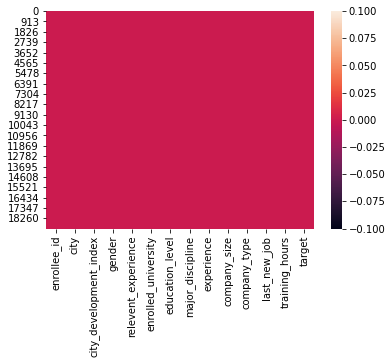

In [293]:
sns.heatmap(df1.isnull())